In [1]:
import pandas as pd

i = 18
train_df = pd.read_csv(f'/opt/ml/level2_klue_nlp-level2-nlp-11/dataset/prediction/klue_roberta-large_{i}.csv')

In [51]:
group = train_df['pred_label'].value_counts()
idx = group.index

In [27]:
for i in range(2,20):
  try:
    train_df = pd.read_csv(f'/opt/ml/level2_klue_nlp-level2-nlp-11/dataset/prediction/klue_roberta-large_{i}.csv')
    print(f'----------klue_roberta-large_{i}.csv의 비율----------')
    group = train_df['pred_label'].value_counts()
    for x, y in group.items() :
      print(f'{x:40} : {y:5},  ratio : {y / len(train_df) : .5f}')
      if (y / len(train_df) < 0.05):
        break
  except:
    pass

----------klue_roberta-large_2.csv의 비율----------
no_relation                              :  4688,  ratio :  0.60373
per:title                                :   716,  ratio :  0.09221
org:top_members/employees                :   357,  ratio :  0.04598
----------klue_roberta-large_3.csv의 비율----------
no_relation                              :  4664,  ratio :  0.60064
per:title                                :   712,  ratio :  0.09169
org:top_members/employees                :   387,  ratio :  0.04984
----------klue_roberta-large_4.csv의 비율----------
no_relation                              :  4447,  ratio :  0.57270
per:title                                :   762,  ratio :  0.09813
org:top_members/employees                :   480,  ratio :  0.06182
per:employee_of                          :   290,  ratio :  0.03735
----------klue_roberta-large_5.csv의 비율----------
no_relation                              :  4554,  ratio :  0.58648
per:title                                :   689,  ratio

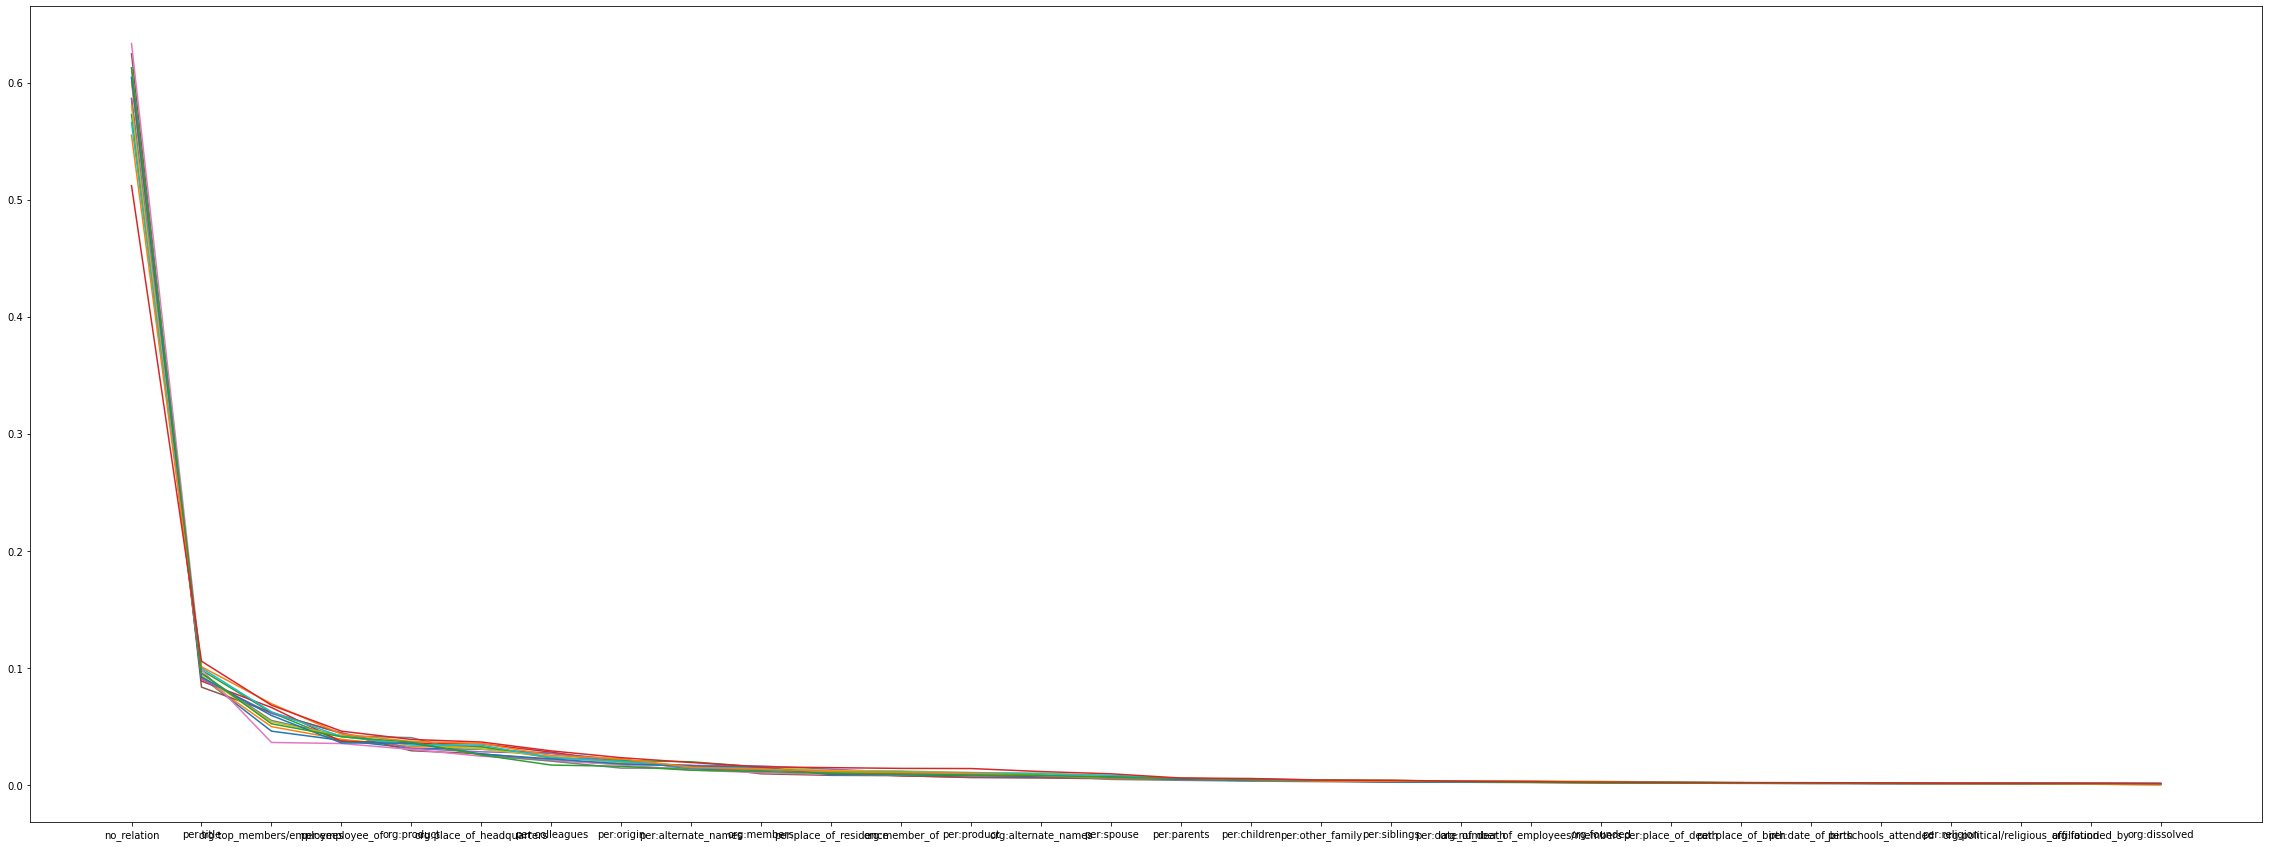

In [105]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 15))
for i in range(2,20):
  try:
    train_df = pd.read_csv(f'/opt/ml/level2_klue_nlp-level2-nlp-11/dataset/prediction/klue_roberta-large_{i}.csv')
    # print(f'----------klue_roberta-large_{i}.csv의 비율----------')
    group = train_df['pred_label'].value_counts() / len(train_df)
    # print(group)
    
    # x = group.values/len(train_df)
    # y = group.index
    plt.plot(idx,group.values)
  except:
      pass
plt.show()

In [2]:
from math import log2
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

def jsd(p,q):
    return (kl_divergence(p,q) + kl_divergence(q,p)) / 2

In [82]:
# # 모든 csv파일의 조합 jsd 구하기
# for i in range(2,20):
#     try:
#         train_df2 = pd.read_csv(f'/opt/ml/level2_klue_nlp-level2-nlp-11/dataset/prediction/ensemble/output ({i}).csv')
#         group2 = train_df2['pred_label'].value_counts() / len(train_df2)
#     except:
#         pass
#     for j in range(i+1,20):
#         try:
#             train_df3 = pd.read_csv(f'/opt/ml/level2_klue_nlp-level2-nlp-11/dataset/prediction/ensemble/output ({j}).csv')
#             group3 = train_df3['pred_label'].value_counts() / len(train_df3)
#             print(f"csv_{i} and csv_{j}'s jsd :", jsd(group2,group3))
#         except:
#             pass

csv_2 and csv_3's jsd : 0.0019041722889068355
csv_2 and csv_4's jsd : 0.008807253652839108
csv_2 and csv_5's jsd : 0.009289770905932762
csv_2 and csv_7's jsd : 0.006484755807285221
csv_2 and csv_8's jsd : 0.012785766949859317
csv_2 and csv_9's jsd : 0.008292401432665486
csv_2 and csv_11's jsd : 0.011767028068695383
csv_2 and csv_12's jsd : 0.004755992913627931
csv_2 and csv_13's jsd : 0.00889125209551895
csv_2 and csv_14's jsd : 0.007324917092369279
csv_2 and csv_15's jsd : 0.014809327425984608
csv_2 and csv_17's jsd : 0.008422579986102914
csv_2 and csv_18's jsd : 0.029411263626015774
csv_3 and csv_4's jsd : 0.0047244807302458895
csv_3 and csv_5's jsd : 0.006381137041607617
csv_3 and csv_7's jsd : 0.005095186911646633
csv_3 and csv_8's jsd : 0.009595079462718158
csv_3 and csv_9's jsd : 0.009003347692133248
csv_3 and csv_11's jsd : 0.009189679749204913
csv_3 and csv_12's jsd : 0.003568915123031922
csv_3 and csv_13's jsd : 0.00572886731500084
csv_3 and csv_14's jsd : 0.003946037562553946

In [81]:
# for i in range(2,20):
#     train_df2 = pd.read_csv(f'/opt/ml/level2_klue_nlp-level2-nlp-11/dataset/prediction/klue_roberta-large_{i}.csv')
#     group2 = train_df2['pred_label'].value_counts() / len(train_df2)
#     for j in range(i+1,20):
#         print(i,j)
#         train_df3 = pd.read_csv(f'/opt/ml/level2_klue_nlp-level2-nlp-11/dataset/prediction/klue_roberta-large_{j}.csv')
#         group3 = train_df3['pred_label'].value_counts() / len(train_df3)
#         print(kl_divergence(group2,group3))

In [68]:
# kl_divergence(group3,group2)

0.0018863810246584024

In [17]:
# output (n) 기준으로 jsd 구하기
n = 1
train_df2 = pd.read_csv(f'/opt/ml/level2_klue_nlp-level2-nlp-11/dataset/prediction/ensemble/output ({n}).csv')
group2 = train_df2['pred_label'].value_counts() / len(train_df2)
my_dict = {}
for i in range(1,62):
    try:
        train_df3 = pd.read_csv(f'/opt/ml/level2_klue_nlp-level2-nlp-11/dataset/prediction/ensemble/output ({i}).csv')
        group3 = train_df3['pred_label'].value_counts() / len(train_df3)
        my_dict[f"csv_{n} and csv_{i}'s jsd"] = jsd(group2,group3)
    except Exception as e:
        print(i,':',e)
sorted_by_value = sorted(my_dict.items(), key=lambda x: x[1], reverse=True)
sorted_by_value

19 : index 29 is out of bounds for axis 0 with size 29
43 : index 29 is out of bounds for axis 0 with size 29
56 : index 29 is out of bounds for axis 0 with size 29
60 : index 28 is out of bounds for axis 0 with size 28


[("csv_1 and csv_61's jsd", 0.04202025385639627),
 ("csv_1 and csv_40's jsd", 0.024621892264312224),
 ("csv_1 and csv_57's jsd", 0.014844167288321313),
 ("csv_1 and csv_44's jsd", 0.012275205796427144),
 ("csv_1 and csv_55's jsd", 0.010313328905374078),
 ("csv_1 and csv_21's jsd", 0.010188575078876445),
 ("csv_1 and csv_59's jsd", 0.009758358843686418),
 ("csv_1 and csv_51's jsd", 0.009695922023223147),
 ("csv_1 and csv_46's jsd", 0.009303364392978016),
 ("csv_1 and csv_53's jsd", 0.009057650475948874),
 ("csv_1 and csv_45's jsd", 0.008557813142773858),
 ("csv_1 and csv_27's jsd", 0.007191463196707085),
 ("csv_1 and csv_42's jsd", 0.006671702198294037),
 ("csv_1 and csv_37's jsd", 0.0066696877371582855),
 ("csv_1 and csv_38's jsd", 0.0066696877371582855),
 ("csv_1 and csv_18's jsd", 0.006392032641886745),
 ("csv_1 and csv_41's jsd", 0.006151232710134008),
 ("csv_1 and csv_10's jsd", 0.005253131593498696),
 ("csv_1 and csv_15's jsd", 0.004891679437269028),
 ("csv_1 and csv_16's jsd", 0.

In [140]:
n = 19
train_df2 = pd.read_csv(f'/opt/ml/level2_klue_nlp-level2-nlp-11/dataset/prediction/ensemble/output ({n}).csv')
group2 = train_df2['pred_label'].value_counts() / len(train_df2)
my_dict = {}
for i in [19,43,56]:
    try:
        train_df3 = pd.read_csv(f'/opt/ml/level2_klue_nlp-level2-nlp-11/dataset/prediction/ensemble/output ({i}).csv')
        group3 = train_df3['pred_label'].value_counts() / len(train_df3)
        my_dict[f"csv_{n} and csv_{i}'s jsd"] = jsd(group2,group3)
    except Exception as e:
        print(i,':',e)
sorted_by_value = sorted(my_dict.items(), key=lambda x: x[1], reverse=True)
sorted_by_value

[("csv_19 and csv_56's jsd", 0.01347979255841342),
 ("csv_19 and csv_43's jsd", 0.00803827122429961),
 ("csv_19 and csv_19's jsd", 0.0)]